In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from agents.sac_disc import SAC
import matplotlib.pyplot as plt
import gym

In [2]:
env = gym.make('CartPole-v1')

In [3]:
sac = SAC(
    env=env,
    name='cartpole_discrete',
    input_dim=env.observation_space.shape[0],
    log_freq=10,
#     load_mdls=True,
)

In [4]:
sac.run(2000)

collecting experience...
0..10..

../agents/sac_disc.py:313: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = T(state, device=DEVICE)


20..30..40..50..60..70..80..90..100..110..120..130..140..150..160..170..180..190..200..210..220..230..240..250..260..270..280..290..300..310..320..330..340..350..360..370..380..390..400..410..420..430..440..450..460..470..480..490..500..510..520..530..540..550..560..570..580..590..600..610..620..630..640..650..660..670..680..690..700..710..720..730..740..750..760..770..780..790..800..810..820..830..

../agents/sac_disc.py:256: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rewards = T(rewards, dtype=torch.float, device=DEVICE)
../agents/sac_disc.py:257: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dones = T(dones, dtype=torch.float, device=DEVICE)
../agents/sac_disc.py:258: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  nxt_states = T(nxt_states, dtype=torch.float, device=DEVICE)
../agents/sac_disc.py:259: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach

Episode: 840, Reward: 26.0, Avg. Reward: 21.74, Policy Loss=-2.51
Episode: 850, Reward: 13.0, Avg. Reward: 22.28, Policy Loss=-5.44
Episode: 860, Reward: 16.0, Avg. Reward: 21.58, Policy Loss=-7.67
Episode: 870, Reward: 48.0, Avg. Reward: 20.74, Policy Loss=-10.55
Episode: 880, Reward: 200.0, Avg. Reward: 34.84, Policy Loss=-26.0
Episode: 890, Reward: 158.0, Avg. Reward: 63.18, Policy Loss=-77.32
Episode: 900, Reward: 200.0, Avg. Reward: 94.86, Policy Loss=-132.26
Episode: 910, Reward: 129.0, Avg. Reward: 120.96, Policy Loss=-158.09
Episode: 920, Reward: 147.0, Avg. Reward: 143.22, Policy Loss=-161.99
Episode: 930, Reward: 200.0, Avg. Reward: 162.98, Policy Loss=-155.14
Episode: 940, Reward: 200.0, Avg. Reward: 169.92, Policy Loss=-159.99
Episode: 950, Reward: 200.0, Avg. Reward: 174.38, Policy Loss=-161.8


KeyboardInterrupt: 

In [6]:
sac.evaluate()

### Traning

Text(0.5, 1.0, 'Average reward per episode')

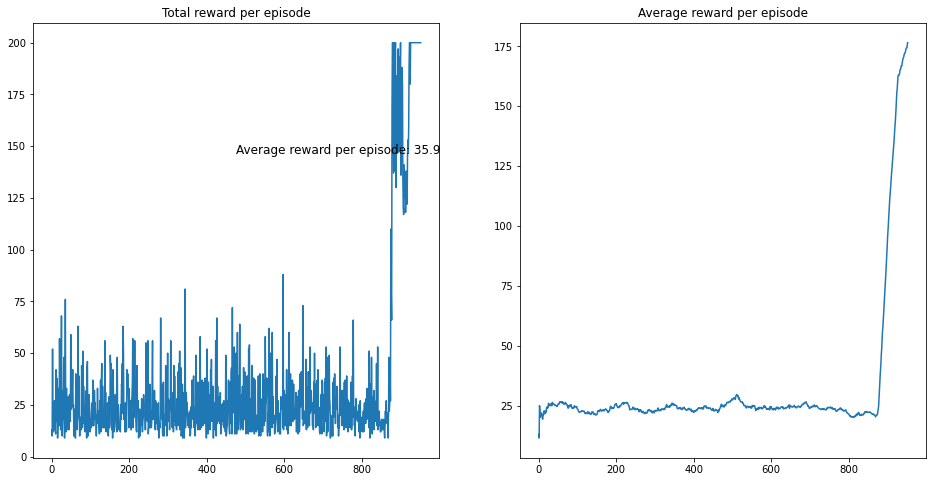

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

total_rewards = [log['reward'] for _, log in sac.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0].plot(range(len(total_rewards)), total_rewards)
ax[0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0].transAxes, size='large')
ax[0].set_title('Total reward per episode')

cumulative_rewards = [log['avg_reward'] for _, log in sac.logs.items()]
ax[1].plot(range(len(total_rewards)), cumulative_rewards)
ax[1].set_title('Average reward per episode')

### Evaluation

Text(0.5, 1.0, 'Average reward per episode')

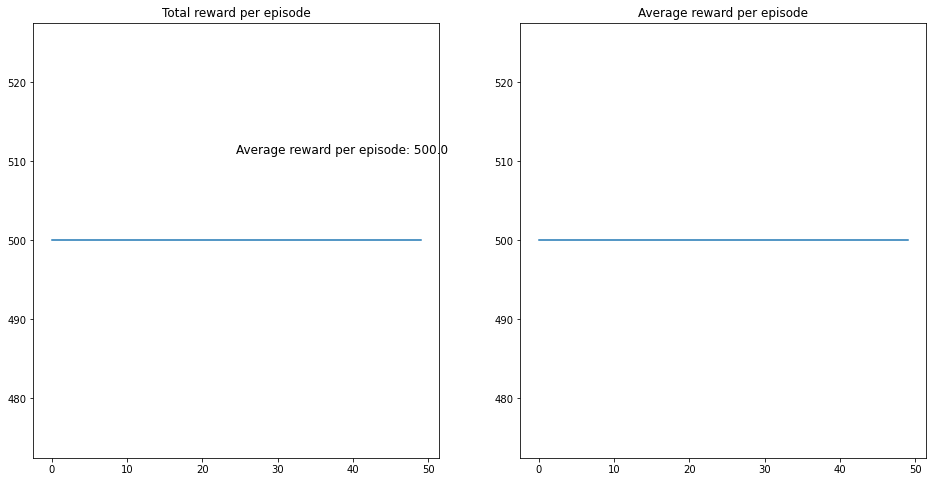

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

total_rewards = [log['reward'] for _, log in sac.eval_logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0].plot(range(len(total_rewards)), total_rewards)
ax[0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0].transAxes, size='large')
ax[0].set_title('Total reward per episode')

cumulative_rewards = [log['reward'] for _, log in sac.eval_logs.items()]
ax[1].plot(range(len(total_rewards)), cumulative_rewards)
ax[1].set_title('Average reward per episode')